In [1]:
import math
import queue
import random
import sys

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import simpy
from matplotlib import colors
from numpy import NaN

from QueueClass import QueueClass
from BurstySource import BurstySource


In [2]:
df_responseTimes = pd.DataFrame(columns=['sourceId', 'time', 'responseTime'])
df_blockRespTimes = pd.DataFrame(
    columns=['sourceId', 'time', 'avgResponseTime', 'epsilon_T'])

np.random.seed(10)

In [3]:
def plotResult(sourceId):
    plt.plot(
        df_responseTimes[df_responseTimes.sourceId == sourceId].time,
        df_responseTimes[df_responseTimes.sourceId == sourceId].responseTime,
        linewidth=1.0, label="source " + str(sourceId))

    # Plot the CI of the block averages
    avg_loss_rate = df_blockRespTimes[df_blockRespTimes.sourceId ==
                                      sourceId].avgResponseTime
    ci = df_blockRespTimes[df_blockRespTimes.sourceId ==
                           sourceId].epsilon_T / 2
    ci = 0.1

    plt.plot(df_blockRespTimes[df_blockRespTimes.sourceId ==
             sourceId].time, avg_loss_rate + ci, 'r--', linewidth=0.5)
    plt.plot(df_blockRespTimes[df_blockRespTimes.sourceId ==
             sourceId].time, avg_loss_rate - ci, 'r--', linewidth=0.5)

    plt.grid(True, which="both", ls="dotted")
    plt.ylim(ymin=0)
    plt.ylabel("Loss rate")
    plt.xlabel("Time units")
    plt.title('Loss rate in function of the time')
    plt.legend()
    # plt.savefig("respTime.png")
    plt.show()

In [ ]:

env = simpy.Environment()

SCALE = 10**6
simulationDuration = 10**1

periodPrintLR = 100
blockSize = 50

q = QueueClass(env, serviceRate=100*SCALE)

# Remove the sources from the dataframes
df_responseTimes = df_responseTimes[~df_responseTimes.sourceId.isin([
                                                                    1, 2, 3])].copy()
df_blockRespTimes = df_blockRespTimes[~df_blockRespTimes.sourceId.isin([
                                                                       1, 2, 3])].copy()


# dataSource = Po1issonSource(env, q, ident=1, transmissionRate=30)

# voiceSource = ConstantSource(
#    env, q, ident=2, transmissionRate=30*SCALE, packetSize=800)
# sources = {voiceSource.ident: voiceSource}

videoSource = BurstySource(env, q, ident=3, transmissionRate=30*SCALE,
                           packetSize=1000, avgPeriodOn=10**-3, peakRate=1)
sources = {videoSource.ident: videoSource}


env.run(until=simulationDuration)

avgPeriodOn: 0.001
avgPeriodOff: 29.999
peakRate * avgPeriodOn / transmissionRate: 3.3333333333333335e-11


In [ ]:
df_responseTimes.head(100)

,sourceId,time,responseTime
0,3,100.0,0.00001
1,3,200.0,0.00001
2,3,300.0,0.00001
3,3,400.0,0.00001
4,3,500.0,0.00001
...,...,...,...
95,3,9600.0,0.00001
96,3,9700.0,0.00001
97,3,9800.0,0.00001
98,3,9900.0,0.00001


In [ ]:
df_blockRespTimes.head(100)

,sourceId,time,avgResponseTime,epsilon_T
0,3,5000.0,0.00001,NaN
1,3,10000.0,0.00001,3.181981
2,3,15000.0,0.00001,2.598076
3,3,20000.0,0.00001,2.250000
4,3,25000.0,0.00001,2.012461
5,3,30000.0,0.00001,1.837117
6,3,35000.0,0.00001,1.700840
7,3,40000.0,0.00001,1.590990
8,3,45000.0,0.00001,1.500000
9,3,50000.0,0.00001,1.423025


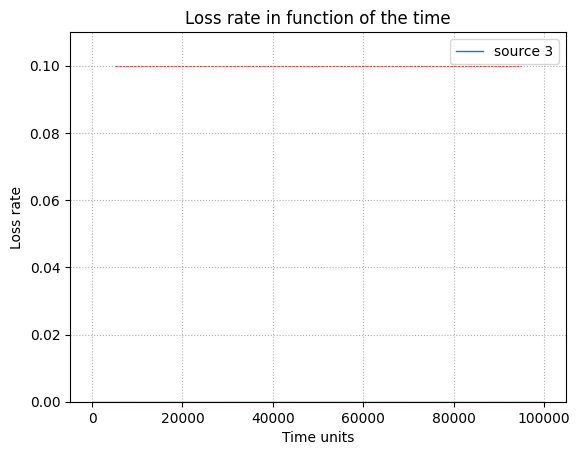

In [ ]:
plotResult(3)